In [1]:
import numpy as np
import scipy.constants as const 
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline
plt.style.use('../presentation.mplstyle')


/home/jmmauricio/bin/anaconda3/lib/python3.4/site-packages/matplotlib/__init__.py:1011: UserWarning: Duplicate key in file "../presentation.mplstyle", line #10
  (fname, cnt))
/home/jmmauricio/bin/anaconda3/lib/python3.4/site-packages/matplotlib/__init__.py:1011: UserWarning: Duplicate key in file "../presentation.mplstyle", line #11
  (fname, cnt))


In [2]:
def catenaria(x,T_0):
    '''
    Devuelve la catenaria
    '''
    
    
    p_m = 0.1888 # kg/m
    
    lam = T_0/p_m
    y = lam * np.cosh(x/lam) 
    
    return y

H = 10.0
T_0 = 407.25 # kg
catenaria(20,T_0)-catenaria(0,T_0)

0.092720124042898533

/home/jmmauricio/bin/anaconda3/lib/python3.4/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


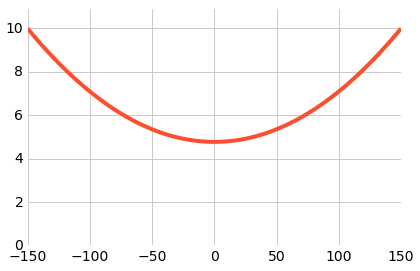

In [16]:
fig, (ax0) = plt.subplots(nrows=1)   # creates a figure with one axe
H = 10.0
vano = 150.0
T_0 = 407.25 # kg

x = np.linspace(-vano,vano,100)

y = catenaria(x,T_0) 

ax0.plot(x,y-y[0]+ H) 
ax0.set_xlim((-vano-1,vano+1))
ax0.set_ylim((0,H+1))
fig.show()

In [13]:
y


array([ 229.07883946,  228.84221661,  228.61050662,  228.38370427,
        228.16180449,  227.94480228,  227.73269278,  227.52547123,
        227.32313297,  227.12567345,  226.93308826,  226.74537306,
        226.56252364,  226.38453589,  226.21140583,  226.04312955,
        225.87970329,  225.72112338,  225.56738626,  225.41848847,
        225.27442667,  225.13519763,  225.00079822,  224.87122543,
        224.74647634,  224.62654817,  224.5114382 ,  224.40114387,
        224.29566268,  224.19499229,  224.09913042,  224.00807492,
        223.92182376,  223.84037498,  223.76372678,  223.69187741,
        223.62482528,  223.56256887,  223.50510679,  223.45243775,
        223.40456057,  223.36147416,  223.32317757,  223.28966994,
        223.26095051,  223.23701863,  223.21787377,  223.20351551,
        223.19394351,  223.18915756,  223.18915756,  223.19394351,
        223.20351551,  223.21787377,  223.23701863,  223.26095051,
        223.28966994,  223.32317757,  223.36147416,  223.40456

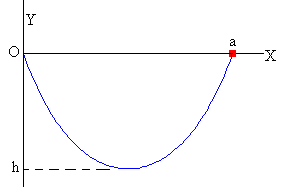

In [4]:

Image("catenaria3.png")

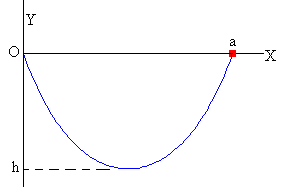

In [5]:
Image("catenaria3.png")

### Este es un titulo

esta prueba